In [2]:
import os 
from datetime import datetime, date, timedelta
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
%matplotlib inline 

In [3]:
#1

In [4]:
df_NYC_dataset = pd.read_csv('311_Service_Requests.csv')

/Users/anadil/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df_NYC_dataset.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
#2

In [7]:
df_NYC_dataset['Created Date']=df_NYC_dataset['Created Date'].astype('datetime64[ns]')
df_NYC_dataset['Closed Date']=df_NYC_dataset['Closed Date'].astype('datetime64[ns]')

In [8]:
df_NYC_dataset['Created Date'].dtype

dtype('<M8[ns]')

In [9]:
df_NYC_dataset['Closed Date'].head()

0   2016-01-01 00:55:00
1   2016-01-01 01:26:00
2   2016-01-01 04:51:00
3   2016-01-01 07:43:00
4   2016-01-01 03:24:00
Name: Closed Date, dtype: datetime64[ns]

In [10]:
df_NYC_dataset['Created Date'].head()

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [11]:
df_NYC_dataset['Closed Date']-df_NYC_dataset['Created Date']

0        0 days 00:55:15
1        0 days 01:26:16
2        0 days 04:51:31
3        0 days 07:45:14
4        0 days 03:27:02
5        0 days 01:53:30
6        0 days 01:57:28
7        0 days 01:47:55
8        0 days 08:33:02
9        0 days 01:23:02
10       0 days 07:48:02
11       0 days 11:07:03
12       0 days 02:28:57
13       0 days 08:30:02
14       0 days 10:29:23
15       0 days 15:32:30
16       0 days 04:51:58
17       0 days 00:51:08
18       0 days 02:56:01
19       0 days 00:47:05
20       0 days 04:31:17
21       0 days 09:32:09
22       0 days 01:15:42
23       0 days 00:52:14
24       2 days 16:50:20
25       0 days 03:16:32
26       0 days 00:26:50
27       0 days 05:40:25
28       0 days 01:46:04
29       0 days 02:29:59
               ...      
300668   0 days 02:36:59
300669   0 days 04:24:33
300670   0 days 08:25:27
300671   0 days 03:45:54
300672   0 days 15:42:26
300673   0 days 01:28:06
300674   0 days 02:20:40
300675   0 days 01:01:30
300676   0 days 07:12:31


In [12]:
def eRCT(row):
    return row['Closed Date'] - row['Created Date']
    
df_NYC_dataset['Request_Closing_Time'] = df_NYC_dataset.apply(eRCT, axis=1)

In [13]:
df_NYC_dataset.shape

(300698, 54)

In [14]:
df_NYC_dataset['Request_Closing_Time'].head()

0   00:55:15
1   01:26:16
2   04:51:31
3   07:45:14
4   03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]

In [15]:
#3

In [16]:
df_NYC_dataset.drop(['Landmark','Facility Type','Park Facility Name'], axis=1, inplace=True)
df_NYC_dataset.drop(df_NYC_dataset.loc[:, 'School Name':'Ferry Terminal Name'], inplace = True, axis = 1)

In [17]:
df_NYC_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 30 columns):
Unique Key                        300698 non-null int64
Created Date                      300698 non-null datetime64[ns]
Closed Date                       298534 non-null datetime64[ns]
Agency                            300698 non-null object
Agency Name                       300698 non-null object
Complaint Type                    300698 non-null object
Descriptor                        294784 non-null object
Location Type                     300567 non-null object
Incident Zip                      298083 non-null float64
Incident Address                  256288 non-null object
Street Name                       256288 non-null object
Cross Street 1                    251419 non-null object
Cross Street 2                    250919 non-null object
Intersection Street 1             43858 non-null object
Intersection Street 2             43362 non-null object
Address Type        

In [18]:
df_NYC_dataset['Location Type'].isnull().sum()

131

In [19]:
df_NYC_dataset['Location Type'].dropna()

0             Street/Sidewalk
1             Street/Sidewalk
2             Street/Sidewalk
3             Street/Sidewalk
4             Street/Sidewalk
5             Street/Sidewalk
6             Street/Sidewalk
7             Street/Sidewalk
8             Street/Sidewalk
9             Street/Sidewalk
10            Street/Sidewalk
11            Street/Sidewalk
12            Street/Sidewalk
13            Street/Sidewalk
14            Street/Sidewalk
15            Street/Sidewalk
16            Street/Sidewalk
17        Club/Bar/Restaurant
18        Club/Bar/Restaurant
19            Street/Sidewalk
20            Street/Sidewalk
21            Street/Sidewalk
22           Store/Commercial
23            Street/Sidewalk
24            Street/Sidewalk
25            Street/Sidewalk
26           House of Worship
27            Street/Sidewalk
28            Street/Sidewalk
29        Club/Bar/Restaurant
                 ...         
300668    Club/Bar/Restaurant
300669        Street/Sidewalk
300670    

In [20]:
df_NYC_dataset['City'].nunique()

53

In [21]:
df_NYC_dataset['City'].unique().tolist()

['NEW YORK',
 'ASTORIA',
 'BRONX',
 'ELMHURST',
 'BROOKLYN',
 'KEW GARDENS',
 'JACKSON HEIGHTS',
 'MIDDLE VILLAGE',
 'REGO PARK',
 'SAINT ALBANS',
 'JAMAICA',
 'SOUTH RICHMOND HILL',
 nan,
 'RIDGEWOOD',
 'HOWARD BEACH',
 'FOREST HILLS',
 'STATEN ISLAND',
 'OZONE PARK',
 'RICHMOND HILL',
 'WOODHAVEN',
 'FLUSHING',
 'CORONA',
 'QUEENS VILLAGE',
 'OAKLAND GARDENS',
 'HOLLIS',
 'MASPETH',
 'EAST ELMHURST',
 'SOUTH OZONE PARK',
 'WOODSIDE',
 'FRESH MEADOWS',
 'LONG ISLAND CITY',
 'ROCKAWAY PARK',
 'SPRINGFIELD GARDENS',
 'COLLEGE POINT',
 'BAYSIDE',
 'GLEN OAKS',
 'FAR ROCKAWAY',
 'BELLEROSE',
 'LITTLE NECK',
 'CAMBRIA HEIGHTS',
 'ROSEDALE',
 'SUNNYSIDE',
 'WHITESTONE',
 'ARVERNE',
 'FLORAL PARK',
 'NEW HYDE PARK',
 'CENTRAL PARK',
 'BREEZY POINT',
 'QUEENS',
 'Astoria',
 'Long Island City',
 'Woodside',
 'East Elmhurst',
 'Howard Beach']

In [22]:
df_NYC_dataset['City'].fillna('Unknown', inplace = True)

In [23]:
complaints_filtered_cat_counts =(df_NYC_dataset.groupby(["Complaint Type","Descriptor"]).size().to_frame("count"))
complaints_filtered_cat_counts

count
Complaint Type           Descriptor                           
Agency Issues            Language Access Complaint           6
Animal Abuse             Chained                           535
                         In Car                            251
                         Neglected                        3787
                         No Shelter                        382
                         Other (complaint details)        1969
                         Tortured                          854
Animal in a Park         Animal Waste                        1
Blocked Driveway         No Access                       56976
                         Partial Access                  20068
Derelict Vehicle         With License Plate              17718
Disorderly Youth         Nuisance/Truant                    41
                         Playing in Unsuitable Place       245
Drinking                 After Hours - Licensed Est         77
                         In Public                         932
                         Underage - Licensed Est           271
Ferry Complaint          Disruptive Passenger                1
                         Homeless Issue                      1
Graffiti                 Police Report Not Requested        23
                         Police Report Requested            90
Illegal Parking          Blocked Hydrant                 16081
                         Blocked Sidewalk                11121
                         Commercial Overnight Parking    12189
                         Detached Trailer                  464
                         Double Parked Blocking Traffic   5731
                         Double Parked Blocking Vehicle   4211
                         Overnight Commercial Storage     1757
                         Posted Parking Sign Violation   22440
                         Unauthorized Bus Layover         1367
Noise - Commercial       Banging/Pounding                 3917
                         Car/Truck Horn                    991
                         Car/Truck Music                   899
                         Loud Music/Party                25787
                         Loud Talking                     3891
                         Loud Television                    92
Noise - House of Worship Banging/Pounding                  248
                         Loud Music/Party                  504
                         Loud Talking                      178
                         Loud Television                     1
Noise - Park             Loud Music/Party                 3109
                         Loud Talking                      933
Noise - Street/Sidewalk  Loud Music/Party                32030
                         Loud Talking                    16582
Noise - Vehicle          Car/Truck Horn                   2520
                         Car/Truck Music                 10374
                         Engine Idling                    4189
Posting Advertisement    Building                           60
                         Vehicle                           590
Traffic                  Chronic Speeding                  268
                         Chronic Stoplight Violation       280
                         Congestion/Gridlock              2761
                         Drag Racing                       175
                         Truck Route Violation            1014
Vending                  In Prohibited Area               2025
                         Unlicensed                       1777

In [24]:
complaints_filtered_cat_counts =(df_NYC_dataset.groupby(["Complaint Type","City"]).size().to_frame("count"))
complaints_filtered_cat_counts.sort_values(by='count',ascending=False)

,,count
Complaint Type,City,
Blocked Driveway,BROOKLYN,28148
Illegal Parking,BROOKLYN,27462
Noise - Street/Sidewalk,NEW YORK,20433
Noise - Commercial,NEW YORK,14550
Noise - Street/Sidewalk,BROOKLYN,13356
Blocked Driveway,BRONX,12755
Illegal Parking,NEW YORK,12128
Noise - Commercial,BROOKLYN,11463
Noise - Street/Sidewalk,BRONX,8892


In [25]:
df_NYC_dataset.groupby('Incident Zip').groups

{83.0: Int64Index([ 17122,  18527,  20887,  23912,  24915,  26172,  26198,  32004,
              33754,  39462,  39494,  44641,  45759,  45830,  45840,  53030,
              53036,  54013,  57565,  61841,  63891,  67628,  69135,  76577,
             109145, 109167, 121742, 121797, 123157, 123160, 124616, 133687,
             139039, 139116, 149252, 154556, 162340, 163573, 163578, 163585,
             164781, 164793, 170061, 178003, 178004, 179346, 179353, 181682,
             186194, 189771, 193916, 202357, 203434, 204699, 204736, 210894,
             210897, 220043, 222442, 227013, 227033, 227309, 228380, 228675,
             228688, 228694, 234932, 234934, 234952, 236229, 236264, 236375,
             236586, 237521, 237690, 237709, 240943, 242641, 243951, 245103,
             253764, 260963, 262204, 265732, 265825, 269334, 269343, 275146,
             275223, 288857, 289793, 289812, 294453, 295197, 296923, 300251,
             300286],
            dtype='int64'),
 10000.0: Int64Index

In [26]:
df_NYC_dataset.groupby('Location Type').count().sort_values(by='Complaint Type',ascending=False)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Incident Zip,Incident Address,Street Name,...,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Borough,Latitude,Longitude,Location,Request_Closing_Time
Location Type,,,,,,,,,,,,,,,,,,,,,
Street/Sidewalk,249299,249299,247503,249299,249299,249299,245740,247116,212334,212334,...,247511,249299,249299,246332,246332,249299,246332,246332,246332,247503
Store/Commercial,20381,20381,20183,20381,20381,20381,19688,20142,18988,18988,...,20184,20381,20381,20136,20136,20381,20136,20136,20136,20183
Club/Bar/Restaurant,17360,17360,17227,17360,17360,17360,17339,17220,15590,15590,...,17230,17360,17360,17200,17200,17360,17200,17200,17200,17227
Residential Building/House,6960,6960,6953,6960,6960,6960,5764,6953,6560,6560,...,6953,6960,6960,6943,6943,6960,6943,6943,6943,6953
Park/Playground,4773,4773,4751,4773,4773,4773,4368,4744,1538,1538,...,4752,4773,4773,4646,4646,4773,4646,4646,4646,4751
House of Worship,929,929,927,929,929,929,929,927,705,705,...,927,929,929,920,920,929,920,920,920,927
Residential Building,227,227,227,227,227,227,227,227,205,205,...,227,227,227,226,226,227,226,226,226,227
Highway,215,215,214,215,215,215,200,213,3,3,...,214,215,215,214,214,215,214,214,214,214
Parking Lot,117,117,117,117,117,117,117,117,72,72,...,117,117,117,116,116,117,116,116,116,117


In [27]:
df_NYC_dataset.groupby('Location Type').count().sort_values(by='Complaint Type',ascending=False)[['Complaint Type']]

,Complaint Type
Location Type,
Street/Sidewalk,249299
Store/Commercial,20381
Club/Bar/Restaurant,17360
Residential Building/House,6960
Park/Playground,4773
House of Worship,929
Residential Building,227
Highway,215
Parking Lot,117


In [28]:
df_NYC_dataset.groupby('Complaint Type').agg([min, max])[['Request_Closing_Time']]

Request_Closing_Time                 
                                           min              max
Complaint Type                                                 
Agency Issues                  0 days 01:07:53  0 days 10:23:00
Animal Abuse                   0 days 00:03:53 21 days 15:16:01
Animal in a Park              14 days 00:50:05 14 days 00:50:05
Bike/Roller/Skate Chronic      0 days 00:04:00  1 days 09:54:52
Blocked Driveway               0 days 00:02:51  6 days 04:17:00
Derelict Vehicle               0 days 00:03:00  9 days 07:22:12
Disorderly Youth               0 days 00:06:03  1 days 04:03:27
Drinking                       0 days 00:04:56  3 days 22:46:00
Ferry Complaint                            NaT              NaT
Graffiti                       0 days 00:09:23  2 days 06:36:43
Homeless Encampment            0 days 00:05:00  3 days 19:18:44
Illegal Fireworks              0 days 00:08:06  1 days 03:51:10
Illegal Parking                0 days 00:02:37 24 days 01:21:36
Noise - Commercial             0 days 00:01:00  5 days 06:24:00
Noise - House of Worship       0 days 00:04:20  2 days 01:06:00
Noise - Park                   0 days 00:04:17  2 days 09:41:00
Noise - Street/Sidewalk        0 days 00:02:00 24 days 16:52:22
Noise - Vehicle                0 days 00:02:43  6 days 03:27:00
Panhandling                    0 days 00:08:58  6 days 01:05:00
Posting Advertisement          0 days 00:02:00  1 days 01:05:13
Squeegee                       0 days 01:10:45  0 days 06:47:12
Traffic                        0 days 00:04:40  2 days 12:08:00
Urinating in Public            0 days 00:08:00  3 days 09:12:01
Vending                        0 days 00:03:09  3 days 04:55:28

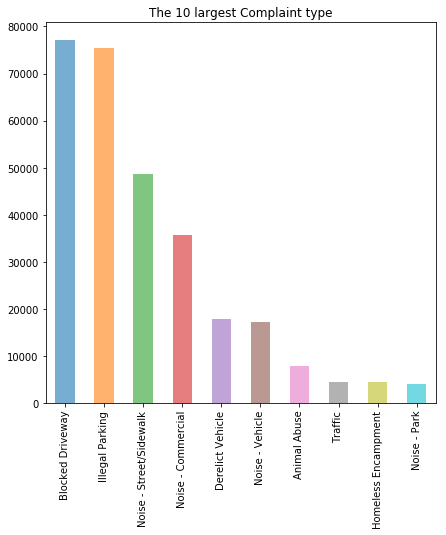

In [29]:
df_NYC_dataset['Complaint Type'].value_counts().nlargest(10).plot(kind='bar',alpha=0.6,figsize=(7,7))
plt.title('The 10 largest Complaint type')
plt.show()

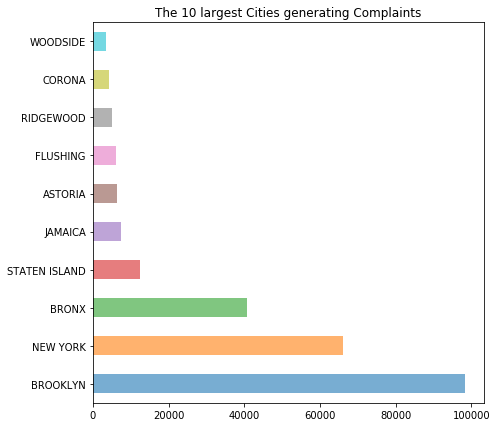

In [30]:
df_NYC_dataset['City'].value_counts().nlargest(10).plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.title('The 10 largest Cities generating Complaints')
plt.show()

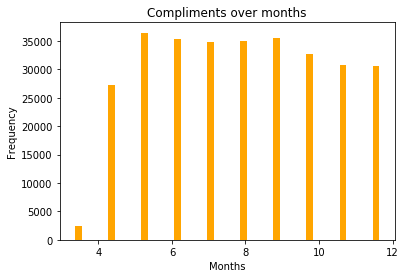

In [31]:
plt.clf()
df_NYC_dataset['Created Date'].map(lambda d: d.month).plot(kind='hist',color='orange',rwidth=0.2)
plt.xlabel("Months")
plt.ylabel("Frequency")
plt.title('Compliments over months')
plt.show()

In [32]:
#4

In [33]:
NYC_311_loc=df_NYC_dataset.groupby(['Location Type','Complaint Type'])
NYC_311_loc['Request_Closing_Time'].apply(lambda x:x.sort_values(ascending=True))

Location Type        Complaint Type             
Bridge               Homeless Encampment  67111    0 days 02:57:19
                                          117502   0 days 04:41:00
Club/Bar/Restaurant  Drinking             270034   0 days 00:07:00
                                          53212    0 days 00:07:00
                                          181962   0 days 00:07:25
                                          144644   0 days 00:08:01
                                          6176     0 days 00:09:47
                                          238491   0 days 00:09:48
                                          142246   0 days 00:10:26
                                          229390   0 days 00:11:00
                                          44000    0 days 00:11:49
                                          6177     0 days 00:12:14
                                          681      0 days 00:12:47
                                          261315   0 days 00:13:00
             

In [34]:
NYC_311_loc=df_NYC_dataset.groupby(['Location Type','Complaint Type'])
NYC_311_loc2=NYC_311_loc['Request_Closing_Time'].apply(lambda x:x.mean())

In [35]:
NYC_311_loc2.sort_values(ascending=True)

Location Type               Complaint Type           
Subway Station              Urinating in Public         0 days 01:09:07.666666
Park/Playground             Panhandling                 0 days 01:13:07.166666
Street/Sidewalk             Posting Advertisement       0 days 01:49:08.375862
Store/Commercial            Illegal Fireworks                  0 days 01:55:27
Parking Lot                 Posting Advertisement       0 days 02:06:56.714285
Roadway Tunnel              Traffic                     0 days 02:10:37.379310
Store/Commercial            Posting Advertisement              0 days 02:22:09
Roadway Tunnel              Homeless Encampment                0 days 02:31:05
Street/Sidewalk             Illegal Fireworks           0 days 02:32:29.992000
Store/Commercial            Disorderly Youth            0 days 02:50:22.125000
Park/Playground             Urinating in Public         0 days 02:51:44.973684
Subway Station              Animal Abuse                0 days 03:02:08.18181

In [36]:
#5

In [37]:
#H0:the average response time across complaint types is similar 
#H1:the average response time across complaint types is not similar 
TR1=df_NYC_dataset[df_NYC_dataset['Complaint Type']=='Animal Abuse']['Request_Closing_Time'].astype(int)
TR2=df_NYC_dataset[df_NYC_dataset['Complaint Type']=='Blocked Driveway']['Request_Closing_Time'].astype(int)

In [55]:
ttest_ind(TR1, TR2)

Ttest_indResult(statistic=2.7492606373862833, pvalue=0.005974250950719817)

In [57]:
p =ttest_ind(TR1,TR2)[1]

In [58]:
p

0.005974250950719817

In [59]:
# interpret via p-value
alpha = .05
if p > alpha:
    print('Accept null hypothesis --> the means are equal.')
else:
    print('Reject the null hypothesis --> the means are NOT equal.')

Reject the null hypothesis --> the means are NOT equal.
